In [50]:
import numpy as np
import tmm_fast.plotting_helper as plth
from tmm_fast.vectorized_tmm_dispersive_multistack import coh_vec_tmm_disp_mstack as tmm
import matplotlib.pyplot as plt


List of articles:
1. [TMM-Fast, a transfer matrix computation package for multilayer thin-film optimization: tutorial](https://opg.optica.org/josaa/fulltext.cfm?uri=josaa-39-6-1007&id=472723)

In [51]:
# bangos ilgiai
wl_nm = np.linspace(400, 1200, 800, dtype=np.int64)
wl = wl_nm * (10 ** (-9))
#kritimo kampai
theta_degrees = np.linspace(70, 90, 40)
theta = theta_degrees * (np.pi / 180)


# sluoksniu skaicius
num_layers = 3

# M - perejimo matrica, su refrakcijos koeficientais kiekviename sluoksnyje, kiekvienam bangos ilgiui

M = np.ones((1, num_layers, wl.shape[0]))
M[:, :, :] = 1.8


# danga supa vakuumas ir stiklas
M[:, 0, :] = 1
M[:, -1, :] = 1.5

# T - sluoksniu storis
T = np.ones((M.shape[0], M.shape[1]))
T[:,:] = 300 * (10 ** (-9))
T[:, 0] = np.inf
T[:, -1] = np.inf

# tmm:
O = tmm("s", M, T, theta, wl, device="cpu")






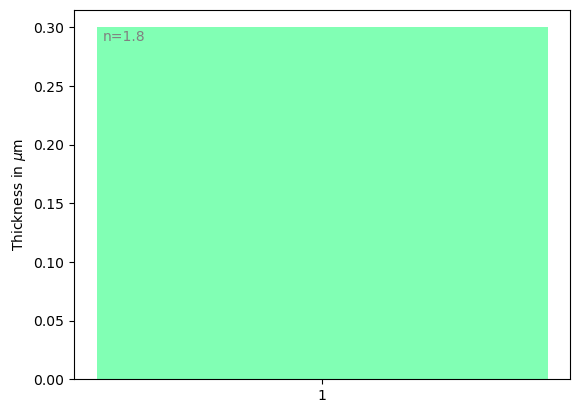

In [52]:
fig, ax = plt.subplots(1, 1)
ax, cmap = plth.plot_stacks(ax, list(M[:, 1:-1, 0]), list(T[:, 1:-1]))

/var/folders/n8/rpx7n_cx0tv1_qmlqf49gsqc0000gn/T/ipykernel_95386/3306137741.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wl_labels)


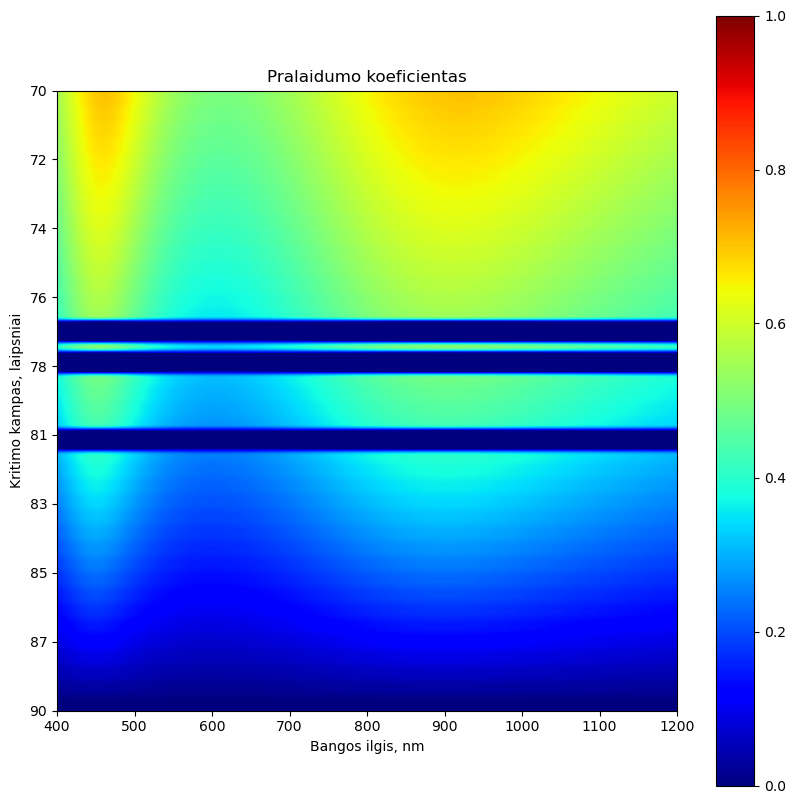

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
heat_map = ax.imshow(O['T'][0], cmap=plt.cm.jet, vmin=0, vmax=1, extent=[0, len(wl), 0, len(wl)])
ax.set_xlabel("Bangos ilgis, nm")
ax.set_ylabel("Kritimo kampas, laipsniai")
ax.set_title("Pralaidumo koeficientas")
wl_labels = np.linspace(wl_nm[0], wl_nm[-1], 9, dtype=np.int64)
ax.set_xticklabels(wl_labels)
theta_labels = np.linspace(theta_degrees[-1], theta_degrees[0], 10, dtype=np.int64)
ax.set_yticks(np.linspace(0, len(wl_nm), 10))
ax.set_yticklabels(theta_labels)
fig.colorbar(heat_map, ax=ax)
plt.show()





/var/folders/n8/rpx7n_cx0tv1_qmlqf49gsqc0000gn/T/ipykernel_95386/2354202114.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wl_labels)


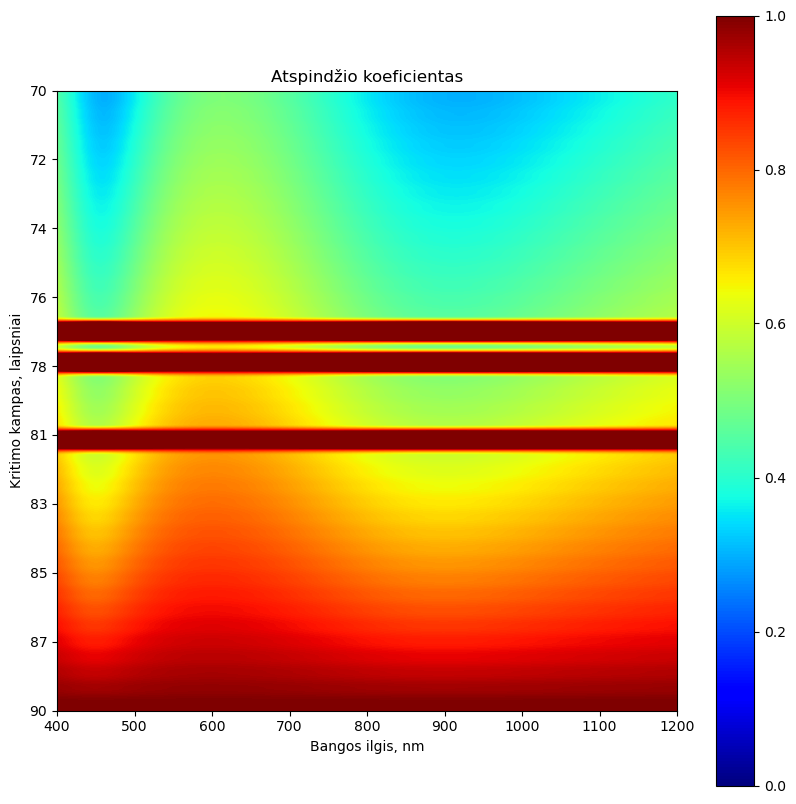

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
heat_map = ax.imshow(O['R'][0], cmap=plt.cm.jet, vmin=0, vmax=1, extent=[0, len(wl), 0, len(wl)])
ax.set_xlabel("Bangos ilgis, nm")
ax.set_ylabel("Kritimo kampas, laipsniai")
ax.set_title("Atspindžio koeficientas")
wl_labels = np.linspace(wl_nm[0], wl_nm[-1], 9, dtype=np.int64)
ax.set_xticklabels(wl_labels)
theta_labels = np.linspace(theta_degrees[-1], theta_degrees[0], 10, dtype=np.int64)
ax.set_yticks(np.linspace(0, len(wl_nm), 10))
ax.set_yticklabels(theta_labels)
fig.colorbar(heat_map, ax=ax)
plt.show()



In [55]:
#grazina atsitiktini sluoksniu skaiciu ir sluoksniu storius tarp vakuumo ir stiklo
def get_random_sample(num_layers=None, stacks=None):
    if num_layers is None:
        num_layers = np.random.randint(3, 12)
    if stacks is None:
        stacks = np.random.randint(1, 10)
    
    # M - perejimo matrica, su refrakcijos koeficientais kiekviename sluoksnyje, kiekvienam bangos ilgiui
    M = np.ones((stacks, num_layers, wl.shape[0]))
    # SiO2, TiO2, ZnO
    materials = [1.47, 2.6142, 2.0034]
    for i in range(stacks):
        for j in range(1, num_layers - 1):
            M[i, j, :] = materials[np.random.randint(0, len(materials))]
        

    # danga supa vakuumas ir stiklas
    M[:, 0, :] = 1
    M[:, -1, :] = 1.5

    # T - sluoksniu storis
    T = np.ones((M.shape[0], M.shape[1]))
    max_t = 400 * (10 ** (-9))
    min_t = 20  * (10 ** (-9))
    T = (max_t - min_t) * np.random.uniform(0, 1, (M.shape[0], M.shape[1])) + min_t
    

    

    T[:, 0] = np.inf
    T[:, -1] = np.inf

    return M, T
    

[0.0003180503845214844, 1.6425061225891113]


/var/folders/n8/rpx7n_cx0tv1_qmlqf49gsqc0000gn/T/ipykernel_95386/3979218586.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(wl_labels)


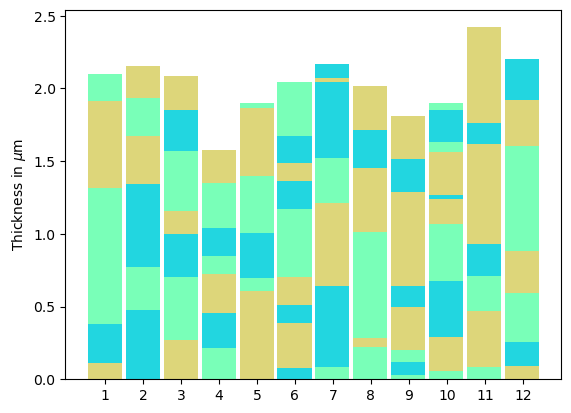

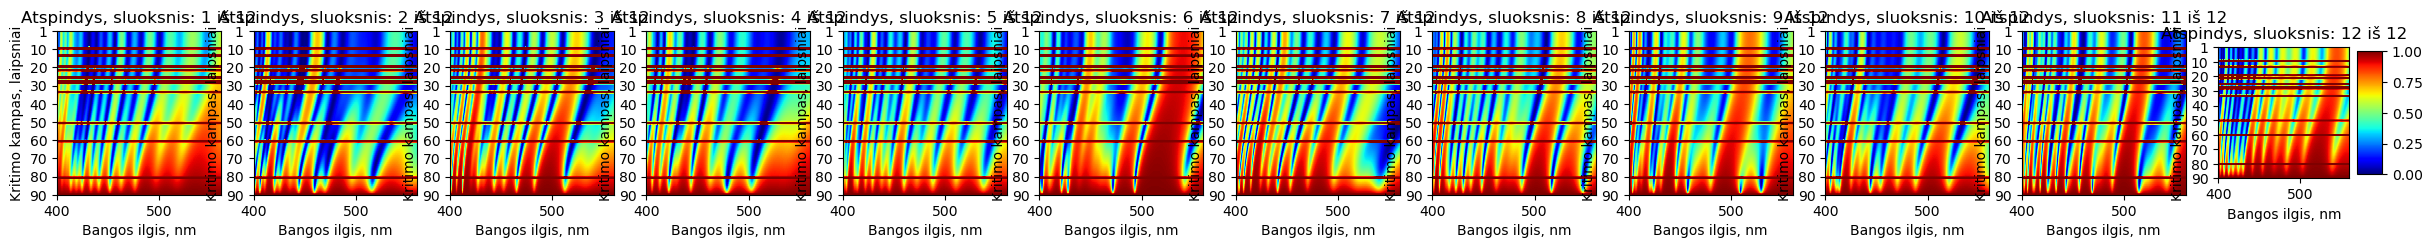

/var/folders/n8/rpx7n_cx0tv1_qmlqf49gsqc0000gn/T/ipykernel_95386/3979218586.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(wl_labels)


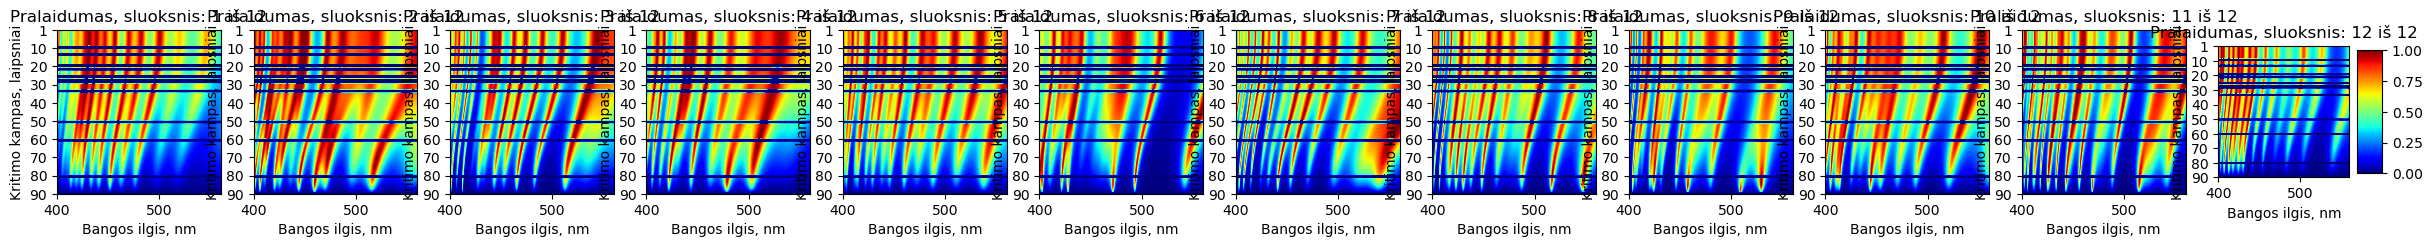

In [56]:
def plot_stacks(M,T, show_mat=True):
    fig, ax = plt.subplots(1, 1)
    ax, cmap = plth.plot_stacks(ax, list(M[:, 1:-1, 0]), list(T[:, 1:-1]), show_material=show_mat)


def plot_transmitivity(O, wl, theta_degrees):
    
    fig, ax = plt.subplots(1, len(O['T']), figsize=(30, 10*len(O['T'])), dpi=100)
    for i in range(len(O['T'])):
        heat_map = ax[i].imshow(O['T'][i], cmap=plt.cm.jet, vmin=0, vmax=1, extent=[0, len(wl), 0, len(wl)])
        ax[i].set_xlabel("Bangos ilgis, nm")
        ax[i].set_ylabel("Kritimo kampas, laipsniai")

        wl_labels = np.linspace(wl[0], wl[-1], 9, dtype=np.int64)
        ax[i].set_xticklabels(wl_labels)
        ax[i].set_title("Pralaidumas, sluoksnis: " + str(i+1) + " iš " + str(len(O['T'])))
        theta_labels = np.linspace(theta_degrees[-1], theta_degrees[1], 10, dtype=np.int64)
        ax[i].set_yticks(np.linspace(0, len(wl), 10))
        ax[i].set_yticklabels(theta_labels)
    fig.colorbar(heat_map, ax=ax[-1], aspect=5)
    plt.show()


def plot_reflectivity(O, wl, theta_degrees):

    fig, ax = plt.subplots(1, len(O['R']), figsize=(30, 10*len(O['R'])), dpi=100)
    for i in range(len(O['R'])):
        heat_map = ax[i].imshow(O['R'][i], cmap=plt.cm.jet, vmin=0, vmax=1, extent=[0, len(wl), 0, len(wl)])
        ax[i].set_xlabel("Bangos ilgis, nm")
        ax[i].set_ylabel("Kritimo kampas, laipsniai")

        wl_labels = np.linspace(wl[0], wl[-1], 9, dtype=np.int64)
        ax[i].set_xticklabels(wl_labels)
        ax[i].set_title("Atspindys, sluoksnis: " + str(i+1) + " iš " + str(len(O['R'])))
        theta_labels = np.linspace(theta_degrees[-1], theta_degrees[1], 10, dtype=np.int64)
        ax[i].set_yticks(np.linspace(0, len(wl), 10))
        ax[i].set_yticklabels(theta_labels)
    fig.colorbar(heat_map, ax=ax[-1], aspect=5)
    plt.show()


theta_degrees = np.linspace(0, 90, 90)
theta = theta_degrees * (np.pi / 180)
wl_nm = np.linspace(400, 1200, 800, dtype=np.int64)
wl = wl_nm * (10 ** (-9))



M, T = get_random_sample(12, 12)


# "s" - s-polarizuota banga, M - lūžio rodiklių matrica, 
# T - sluoksnių storis, theta - kritimo kampai, wl - bangos ilgiai,
# device - naudojama įrenginio atmintis, "cpu" arba "cuda"
O, timer = tmm("s", M, T, theta, wl, device="cpu",timer=True)


# gražinama atspindžio ir pralaidumo matrica kiekvienai dangai per
# kiekvieną bangos ilg ir kiekvieną kritimo kampą 
# bei lūžio rodiklis kiekvienai dangai per kiekvieną bangos ilgį ir kiekvieną kritimo kampą

print(timer)
plot_stacks(M, T, False)
plot_reflectivity(O, wl_nm, theta_degrees)
plot_transmitivity(O, wl_nm, theta_degrees)


